In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
import os

import missingno as msno

In [2]:
print(os.listdir("./dataset"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
app_train = pd.read_csv('./dataset/application_train.csv')

In [4]:
df = app_train
df.shape

(307511, 122)

In [5]:
dfs = df.sample(frac=0.05, replace=False, random_state=42)
dfs.shape

(15376, 122)

In [6]:
X = dfs.drop('TARGET', axis=1)
y = dfs['TARGET']

In [7]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

In [8]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in X:
    if X[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(X[col].unique())) <= 2:
            # Train on the training data
            le.fit(X[col])
            # Transform both training and testing data
            X[col] = le.transform(X[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1


# one-hot encoding of categorical variables
X = pd.get_dummies(X)

<AxesSubplot:>

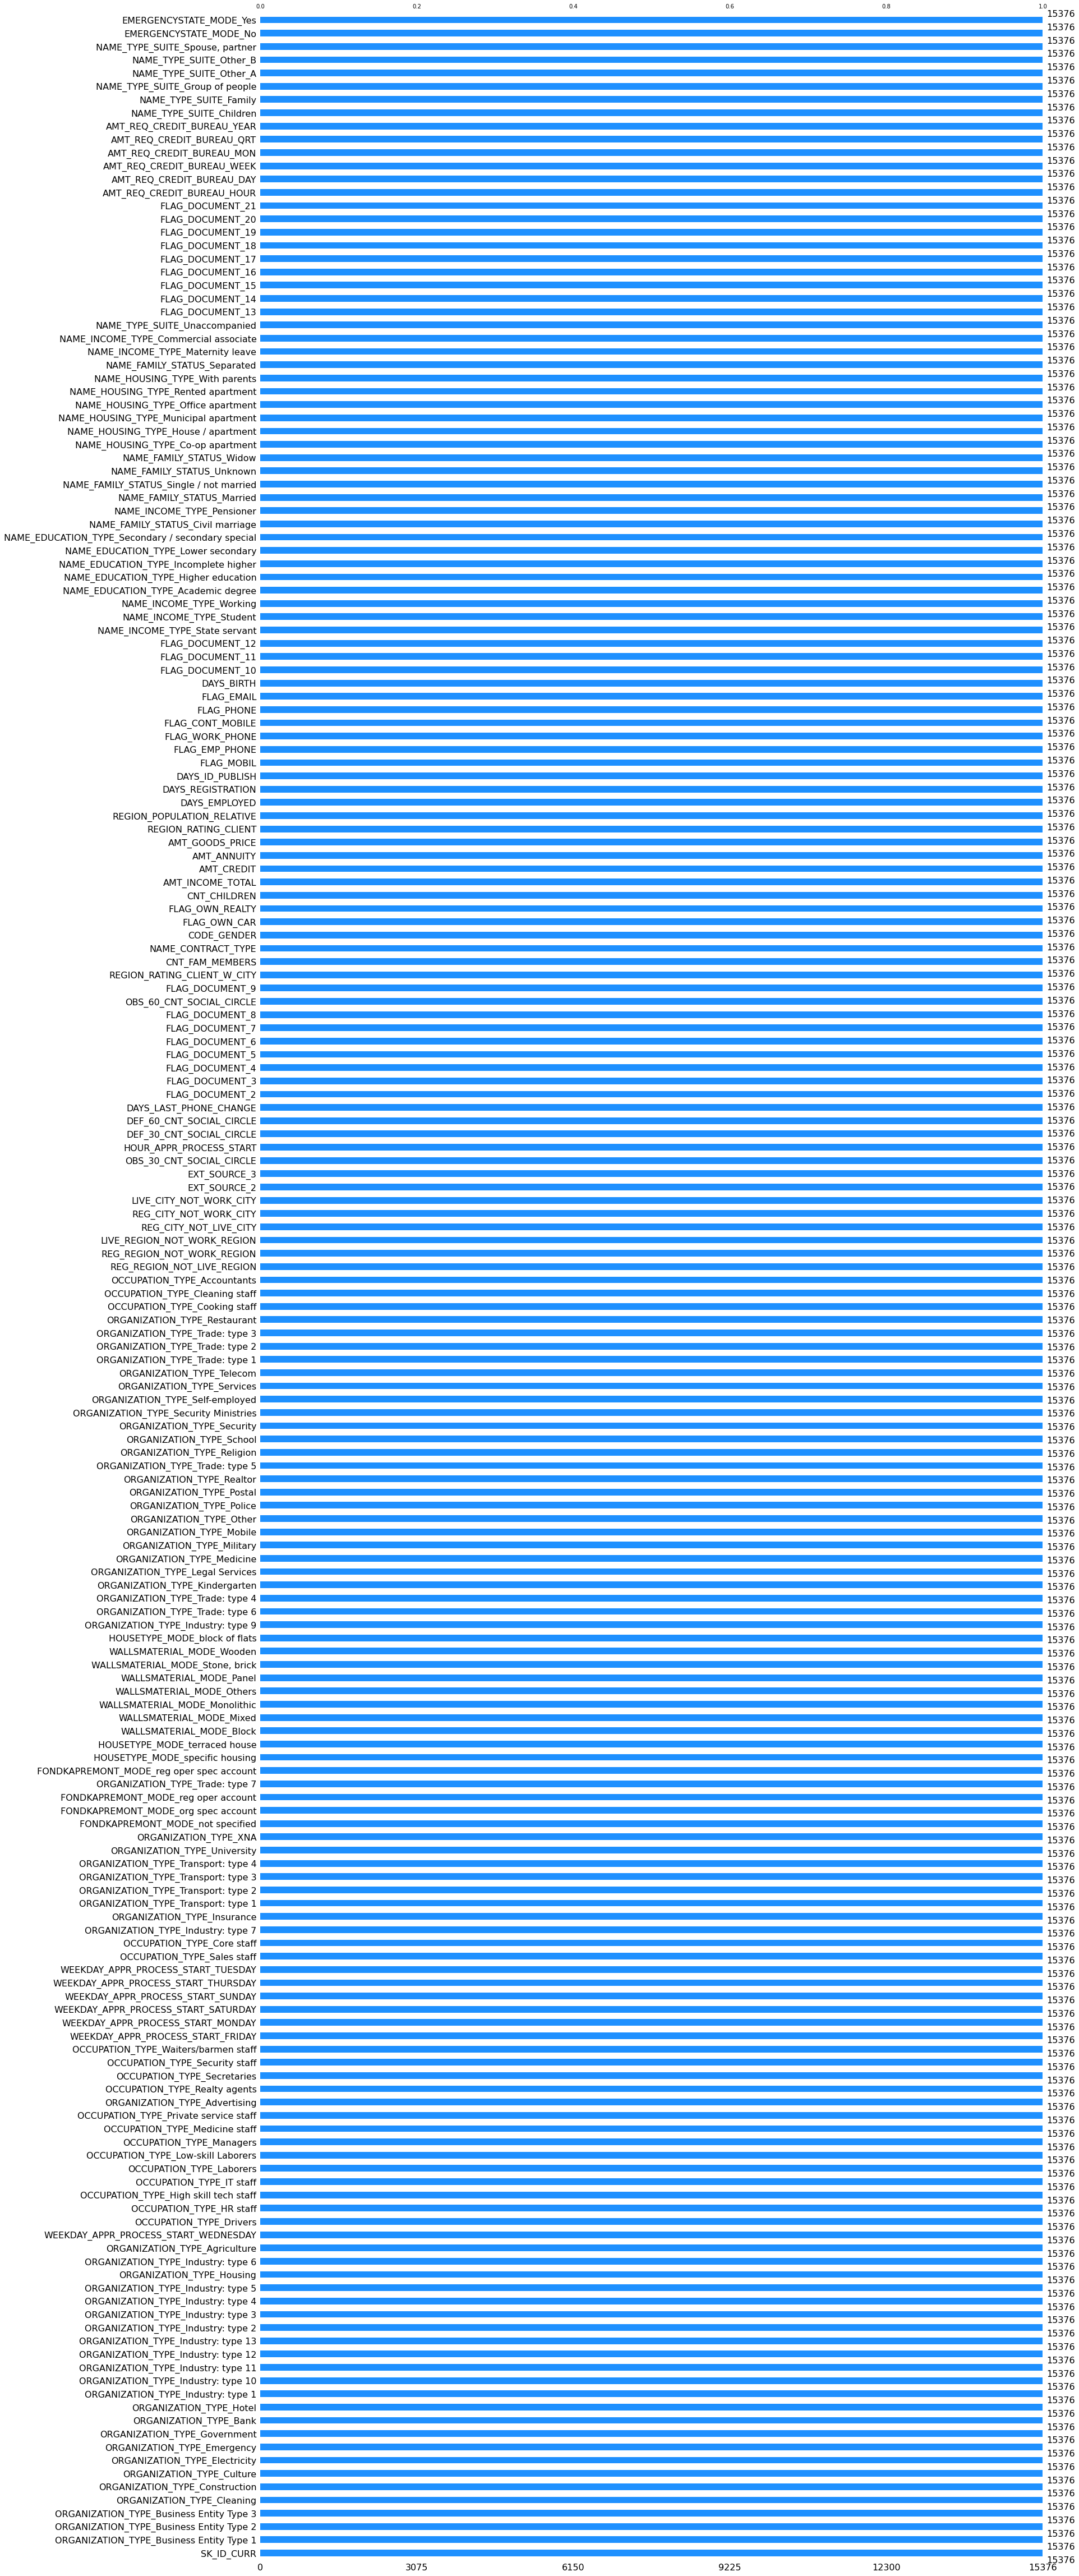

In [28]:
msno.bar(X, sort="ascending", color="dodgerblue")

In [24]:
X = X.dropna(axis=1, thresh=len(X)*0.75)

In [27]:
fill_mean = lambda col : col.fillna(col.median())

X = X.apply(fill_mean, axis = 0)

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
sm = SMOTE(k_neighbors=3, sampling_strategy=0.75)
X_res, y_res = sm.fit_resample(X,y)

In [40]:
y.value_counts()

0    14122
1     1254
Name: TARGET, dtype: int64

In [41]:
y_res.value_counts()

0    14122
1    10591
Name: TARGET, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train["INCOME_PER_PERS"] = X_train["AMT_INCOME_TOTAL"] / (X_train["CNT_CHILDREN"]+1)
X_test["INCOME_PER_PERS"] = X_test["AMT_INCOME_TOTAL"] / (X_test["CNT_CHILDREN"]+1)

In [45]:
X_train["EMPLOYED_BIRTH_RATIO"] = X_train["DAYS_EMPLOYED"] / X_train["DAYS_BIRTH"]
X_test["EMPLOYED_BIRTH_RATIO"] = X_test["DAYS_EMPLOYED"] / X_test["DAYS_BIRTH"]

In [47]:
X_train["CREDIT_PRICE_RATIO"] = X_train["AMT_CREDIT"] / X_train["AMT_GOODS_PRICE"]
X_test["CREDIT_PRICE_RATIO"] = X_test["AMT_CREDIT"] / X_test["AMT_GOODS_PRICE"]

In [48]:
created_vars = ['INCOME_PER_PERS', 'EMPLOYED_BIRTH_RATIO', 'CREDIT_PRICE_RATIO']

In [54]:
app_train = X_train
app_train['TARGET'] = y_train

In [58]:
app_train['INCOME_PER_PERS'].corr(app_train['TARGET'])

0.024531729484551894

In [59]:
app_train['EMPLOYED_BIRTH_RATIO'].corr(app_train['TARGET'])

0.04204910462391676

In [60]:
app_train['CREDIT_PRICE_RATIO'].corr(app_train['TARGET'])

0.08125441737535397